In [107]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


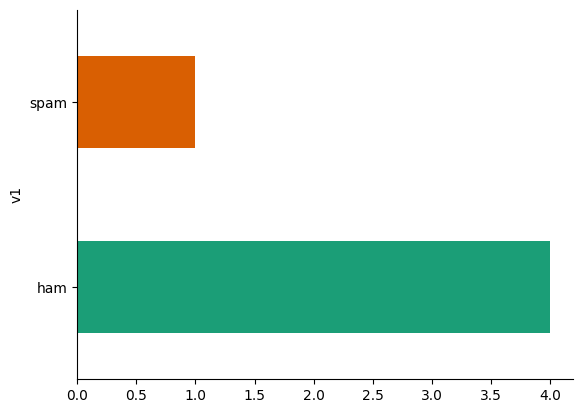

In [108]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [109]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [110]:
df=df[['v1','v2']]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [111]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [112]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [127]:
from sklearn.model_selection import train_test_split
x=df['v2']
y=df['v1']

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [129]:
#from sklearn.feature_extraction.text import CountVectorizer
#count_vect=CountVectorizer()
#count_vect.fit(x_train)
#x_train_count=count_vect.tranform(x_train)
#x_train_count=count_vect.fit_transform(x_train)


In [130]:
#x_train_count

In [131]:
x_train.shape

(3900,)

In [132]:
#from sklearn.feature_extraction.text import TfidfTransformer
#tfidf=TfidfTransformer()
#x_train_tfidf=tfidf.fit_transform(x_train_count)


In [133]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vect=TfidfVectorizer()
#x_train_tfidf=vect.fit_transform(x_train)


In [134]:
#from sklearn.svm import LinearSVC
#clf=LinearSVC()
#clf.fit(x_train_tfidf,y_train)


In [135]:
from sklearn.pipeline import Pipeline
text_clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [136]:
text_clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [144]:
pred=text_clf.predict(x_test)
pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [138]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,pred)

array([[1450,    3],
       [  25,  194]])

In [139]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n         ham       0.98      1.00      0.99      1453\n        spam       0.98      0.89      0.93       219\n\n    accuracy                           0.98      1672\n   macro avg       0.98      0.94      0.96      1672\nweighted avg       0.98      0.98      0.98      1672\n'

In [143]:
text_clf.predict(['you won free dollars'])

array(['spam'], dtype=object)